In [4]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
# hyper parameter setting
batch_size = 100
num_epochs = 10
learning_rate = 0.001


# Prepare Dataset
path = './'

# Normalize dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])

# Download dataset 
train_data = datasets.FashionMNIST(path, train=True, transform=transform, download=True)
test_data = datasets.FashionMNIST(path, train=False, transform=transform, download=True)

# Make Dataloader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size= batch_size)


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw




Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:


## Fully Connected Layer
class FCN(nn.Module):
    def __init__(self):
        super(FCN, self).__init__()
        self.layer1 = nn.Sequential(
            
            nn.Linear(28*28, 512,bias = True),
            torch.nn.BatchNorm1d(512),
            torch.nn.ReLU()    
            
        )
        self.layer2 = nn.Sequential(
            nn.Linear(512,10,bias=True), 
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # flatten the input image
        x = self.layer1(x)
        x_out = self.layer2(x)
        return x_out



In [8]:
# method for initialize model`s weights using xavier normalization
def initWeights(m):
    if isinstance(m, nn.Linear): 
        nn.init.xavier_normal_(m.weight)

# Create model and initialize model
model_fcn = FCN().to(device)
model_fcn.apply(initWeights)

# Make Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_fcn.parameters(), lr = learning_rate)

print(model_fcn)

FCN(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [9]:

#  Train
model_fcn.train()  # LeNet-5의 경우 model_fcn 대신 model_lenet을 사용
loss_list_fcn = []  # LeNet-5의 경우 model_fcn 대신 model_lenet을 사용
for epoch in range(num_epochs):

    avg_loss=0
    # loop until every batch dataset is learned by model
    for i, (imgs, labels) in enumerate(train_loader):
        # send it to gpu
        imgs, labels = imgs.to(device), labels.to(device)
        
        # predict
        prediction = model_fcn(imgs)  # LeNet-5의 경우 model_fcn 대신 model_lenet을 사용
        
       # set optimzer
        optimizer.zero_grad()  

        # calculate loss
        loss = criterion(prediction, labels)    
        
        # learn
        loss.backward()          
        optimizer.step()
        
        # record avg loss
        avg_loss += loss.item()
        
        # prin ith learning loss
        if (i+1) % 100 == 0:
            print('[{},  {}]  loss: {}'.format(epoch+1,  i+1, loss.item()))

    # record avg loss for given batch data for later visulization
    loss_list_fcn.append(avg_loss / len(train_loader))

[1,  100]  loss: 0.4903271496295929
[1,  200]  loss: 0.36250656843185425
[1,  300]  loss: 0.4087992012500763
[1,  400]  loss: 0.5854552388191223
[1,  500]  loss: 0.42846953868865967
[1,  600]  loss: 0.22520023584365845
[2,  100]  loss: 0.26174426078796387
[2,  200]  loss: 0.28359198570251465
[2,  300]  loss: 0.265684574842453
[2,  400]  loss: 0.37319937348365784
[2,  500]  loss: 0.4149552881717682
[2,  600]  loss: 0.25045087933540344
[3,  100]  loss: 0.2597442865371704
[3,  200]  loss: 0.3471852242946625
[3,  300]  loss: 0.21261557936668396
[3,  400]  loss: 0.23157232999801636
[3,  500]  loss: 0.3140323758125305
[3,  600]  loss: 0.2373795509338379
[4,  100]  loss: 0.2562309801578522
[4,  200]  loss: 0.4407864809036255
[4,  300]  loss: 0.3395770192146301
[4,  400]  loss: 0.33585670590400696
[4,  500]  loss: 0.16639775037765503
[4,  600]  loss: 0.2597475051879883
[5,  100]  loss: 0.1675359308719635
[5,  200]  loss: 0.16257646679878235
[5,  300]  loss: 0.1823066771030426
[5,  400]  loss: 

 accuracy of the fully connected network on 10000 images: 88.69%


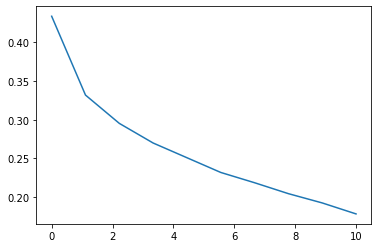

In [15]:
# evaluate model after training

model_fcn.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        prediction = model_fcn(imgs)
        _, argmax = torch.max(prediction, 1) 
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
    
    # print accuracy score
    print(' accuracy of the fully connected network on {} images: {}%'.format(total, correct / total * 100))

# visulize training result 
step = np.linspace(0,num_epochs,num_epochs)
plt.plot(step,np.array(loss_list_fcn))

In [13]:

# define Lenet-5 model 
class Lenet_5(nn.Module):
    def __init__(self):
        super(Lenet_5,self).__init__()
        self.layer1 = nn.Sequential(
            
            torch.nn.Conv2d(in_channels=1, out_channels=6,kernel_size=5,stride=1,padding=2),
            torch.nn.Tanh(),
            torch.nn.AvgPool2d(2,stride=2),
        )
        self.layer2=  nn.Sequential(
            torch.nn.Conv2d(in_channels=6,out_channels=16, kernel_size=5,stride=1),
            torch.nn.Tanh(),
            torch.nn.AvgPool2d(2,stride=2),
        )
        self.layer3=  nn.Sequential(
            torch.nn.Conv2d(in_channels=16,out_channels=120, kernel_size=5,stride=1),
            torch.nn.Tanh(),
            
        )
        self.fclayer1 = nn.Sequential(
            torch.nn.Linear(120,84),
            torch.nn.Tanh(),
        )
        self.fclayer2 = nn.Sequential(
            nn.Linear(84,10),
            
        )
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)
        x = self.fclayer1(x)
        x_out = self.fclayer2(x)
        return x_out

            






In [ ]:
## Lenet-5 modified(task2)

# torch.manual_seed(777)
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False
# np.random.seed(777)
# # define Lenet-5 model 
# class Lenet_5_modified(nn.Module):
#     def __init__(self):
#         super(Lenet_5_modified,self).__init__()
#         self.layer1 = nn.Sequential(
            
#             torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5,stride=1,padding=2),
#             torch.nn.BatchNorm2d(6),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(2,stride=2),
            
#         )
#         self.layer2=  nn.Sequential(
#             torch.nn.Conv2d(in_channels=6,out_channels=16, kernel_size=5,stride=1),
#             torch.nn.BatchNorm2d(16),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(2,stride=2),
            
#         )
#         self.layer3=  nn.Sequential(
#             torch.nn.Conv2d(in_channels=16,out_channels=120, kernel_size=5,stride=1),
#             torch.nn.BatchNorm2d(120),
#             torch.nn.ReLU()
            
#         )
#         self.fclayer1 = nn.Sequential(
#             torch.nn.Linear(120,84),
#             torch.nn.ReLU()
#         )
#         self.fclayer2 = nn.Sequential(
#             nn.Linear(84,10)
#         )

#         self.dropout = torch.nn.Dropout(0.2)
#     def forward(self, x):
#         x = self.layer1(x)
#         x = self.layer2(x)
#         x = self.layer3(x)
#         x = x.view(x.size(0), -1)
#         x = self.fclayer1(x)
#         x = self.dropout(x)
#         x_out = self.fclayer2(x)
       
#         return x_out

            






In [14]:
model_lenet = Lenet_5().to(device)
model_lenet.apply(initWeights)

Lenet_5(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
  )
  (fclayer1): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [11]:
# model_lenet = Lenet_5_modified().to(device)
# model_lenet.apply(initWeights)

NameError: ignored

In [19]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_lenet.parameters(), lr = learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.9)


model_lenet.train()
loss_list_lenet = []
for epoch in range(10):
    avg_loss=0
    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad() 

        prediction = model_lenet(imgs)  
        
        loss = criterion(prediction, labels)    
                  
        loss.backward()          
        optimizer.step()
        # scheduler.step()
        avg_loss += loss.item()
        
        if (i+1) % 100 == 0:
            print('[{},  {}]  loss: {}'.format(epoch+1,  i+1, loss.item()))
    loss_list_lenet.append(avg_loss / len(train_loader))

[1,  100]  loss: 0.4105132222175598
[1,  200]  loss: 0.5373636484146118
[1,  300]  loss: 0.3721943795681
[1,  400]  loss: 0.26092034578323364
[1,  500]  loss: 0.3075355589389801
[1,  600]  loss: 0.3608710467815399
[2,  100]  loss: 0.3713463544845581
[2,  200]  loss: 0.35779136419296265
[2,  300]  loss: 0.37440958619117737
[2,  400]  loss: 0.30330973863601685
[2,  500]  loss: 0.3356502056121826
[2,  600]  loss: 0.26909729838371277
[3,  100]  loss: 0.3522796928882599
[3,  200]  loss: 0.20619311928749084
[3,  300]  loss: 0.271048903465271
[3,  400]  loss: 0.26786741614341736
[3,  500]  loss: 0.36844176054000854
[3,  600]  loss: 0.2685846984386444
[4,  100]  loss: 0.2825585603713989
[4,  200]  loss: 0.20982390642166138
[4,  300]  loss: 0.27710938453674316
[4,  400]  loss: 0.44944560527801514
[4,  500]  loss: 0.32547539472579956
[4,  600]  loss: 0.427247017621994
[5,  100]  loss: 0.32031190395355225
[5,  200]  loss: 0.1961265206336975
[5,  300]  loss: 0.25857779383659363
[5,  400]  loss: 0.

 accuracy of the Lenet-5 network on 10000 images: 89.23%


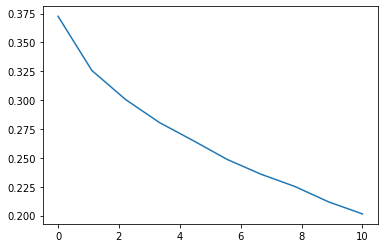

In [20]:
model_lenet.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        prediction = model_lenet(imgs)
        _, argmax = torch.max(prediction, 1) 
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()
        
    print(' accuracy of the Lenet-5 network on {} images: {}%'.format(total, correct / total * 100))

step = np.linspace(0,num_epochs,num_epochs)
plt.plot(step,np.array(loss_list_lenet))